In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [22]:
test_data = pd.read_csv("test.csv")
train_data = pd.read_csv("train.csv")

#view the data
print(train_data.head())
print(train_data['price_range'].value_counts())

   battery_power  blue  clock_speed  ...  touch_screen  wifi  price_range
0            842     0          2.2  ...             0     1            1
1           1021     1          0.5  ...             1     0            2
2            563     1          0.5  ...             1     0            2
3            615     1          2.5  ...             0     0            2
4           1821     1          1.2  ...             1     0            1

[5 rows x 21 columns]
price_range
1    500
2    500
3    500
0    500
Name: count, dtype: int64


In [23]:
#check for potential nulls
print(train_data.isnull().sum())
if 'id' in test_data.columns:
    test_data = test_data.drop('id', axis=1)

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64


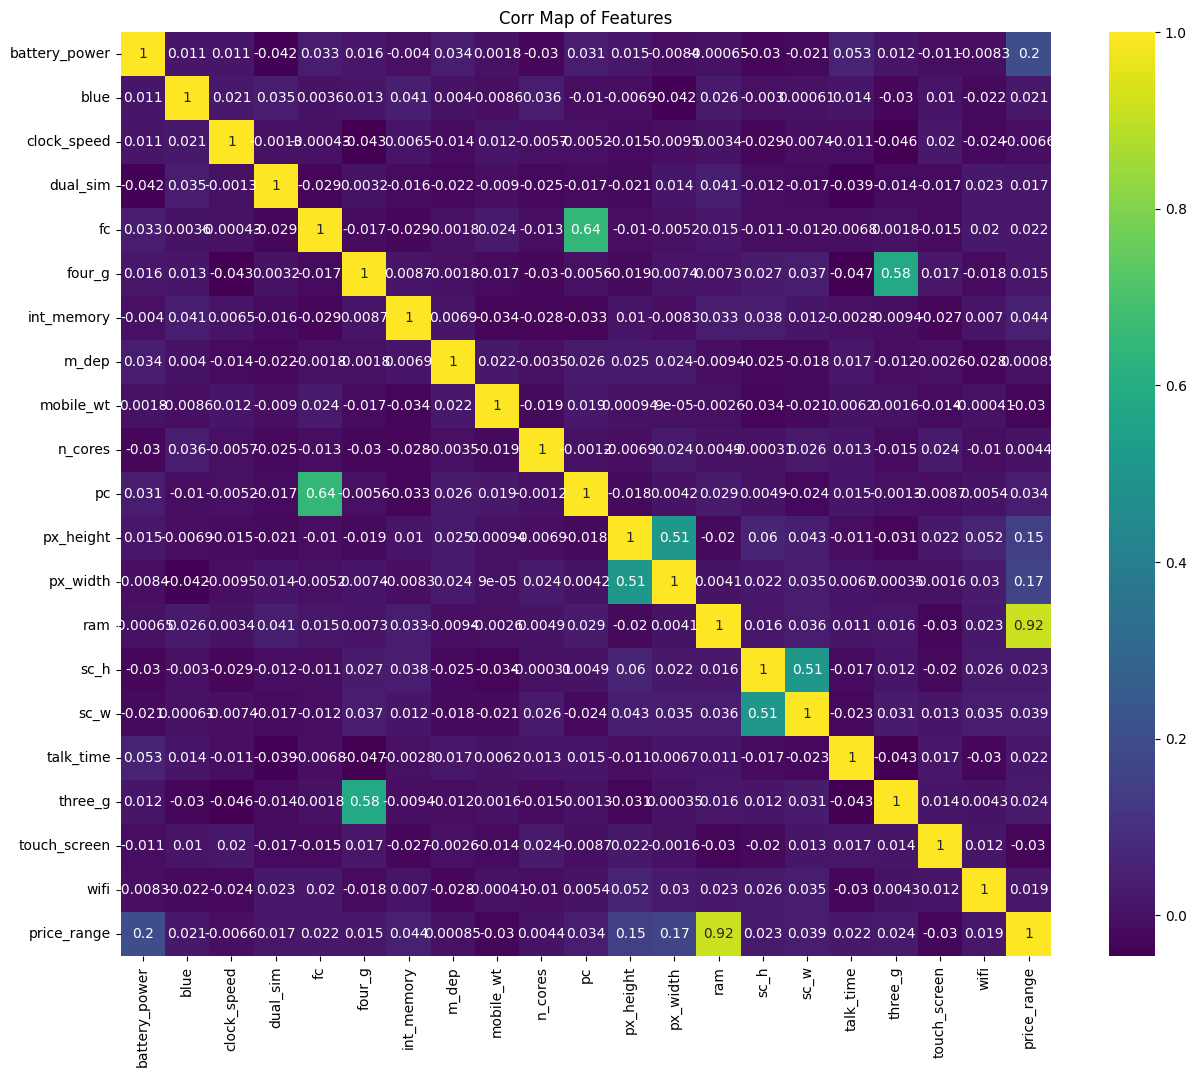

In [24]:
#basic correlation graph to visually see potential relationships
plt.figure(figsize= (15,12))
sns.heatmap(train_data.corr(), annot= True, cmap = 'viridis')
plt.title("Corr Map of Features")
plt.show()

We can observe some notable correlation with some variables such as ram and price range being highly likely to be related.

In [25]:
#split features and labels

features = train_data.drop(['price_range'], axis = 1)
labels = train_data['price_range']

#scale the data to normalize them all
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

#generate train and validation splits
feature_train, feature_val, label_train, label_val =train_test_split(features_scaled, labels, test_size = 0.2, random_state = 42) 

In [26]:
#init  and run random forest and XGBoost

random_forest =RandomForestClassifier(n_estimators= 100, random_state= 42)
random_forest.fit(feature_train, label_train)
random_forest_preds = random_forest.predict(feature_val)

xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=4, eval_metric='mlogloss', use_label_encoder=False, random_state=42)
xgb_model.fit(feature_train, label_train)
xgb_preds = xgb_model.predict(feature_val)


In [27]:
def eval(name, label_true, label_pred):
    print(f"----- {name} -----")
    print("Accuracy:", accuracy_score(label_true, label_pred))
    print("Confusion Matrix:\n", confusion_matrix(label_true, label_pred))
    print("Classification Report:\n", classification_report(label_true, label_pred))


eval("Random Forest", label_val, random_forest_preds)
eval("XGB", label_val, xgb_preds)

----- Random Forest -----
Accuracy: 0.8925
Confusion Matrix:
 [[101   4   0   0]
 [  5  79   7   0]
 [  0   6  80   6]
 [  0   0  15  97]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.96       105
           1       0.89      0.87      0.88        91
           2       0.78      0.87      0.82        92
           3       0.94      0.87      0.90       112

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.90      0.89      0.89       400

----- XGB -----
Accuracy: 0.905
Confusion Matrix:
 [[100   5   0   0]
 [  4  85   2   0]
 [  0   7  78   7]
 [  0   0  13  99]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.96       105
           1       0.88      0.93      0.90        91
           2       0.84      0.85      0.84        92
           3       0.93      0.88

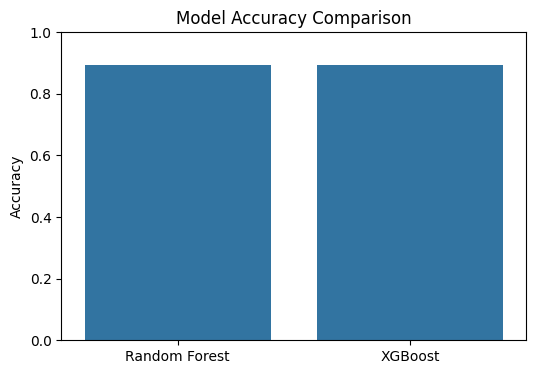

In [28]:
#display accuracies
accuracies = {
    'Random Forest': accuracy_score(label_val, random_forest_preds),
    'XGBoost': accuracy_score(label_val, random_forest_preds)
}

plt.figure(figsize=(6, 4))
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()))
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.show()

In [29]:
#predict on test data
scaler_test = StandardScaler()
features_test_scaled = scaler_test.fit_transform(test_data)
rf_test_preds = random_forest.predict(features_test_scaled)
xgb_test_preds = xgb_model.predict(features_test_scaled)

print("Sample RF predictions on test data:", rf_test_preds[:10])
print("Sample XGBoost predictions on test data:", xgb_test_preds[:10])

Sample RF predictions on test data: [3 3 2 3 1 3 3 1 3 0]
Sample XGBoost predictions on test data: [3 3 2 3 1 3 3 1 3 0]
